This notebook intends to study the background and noise model using monte carlo truth information

In [1]:
import uproot
import tensorflow as tf
import zfit
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math

/opt/anaconda3/envs/m2_req/lib/python3.10/site-packages/zfit/__init__.py:59: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(


In [6]:
data = zfit.Data.from_root("mu2e_caloSimu_crySpec675_simEdep.root", "specTree", ["spec","truespec", "ratio", "ntrig", "stim", "time", "tErg"]) #importing data from root file
cryspec = zfit.Space(['x'], limits=(2,8)) #observable range:: 1.5 limit is placed in fcl file
energy_unbinned = zfit.Data(data["spec"],obs=cryspec) #zfit.Data is used for unbinned data, obs has to be specified
MC_energy = zfit.Data(data["truespec"],obs=cryspec) #zfit.Data is used for unbinned data, obs has to be specified

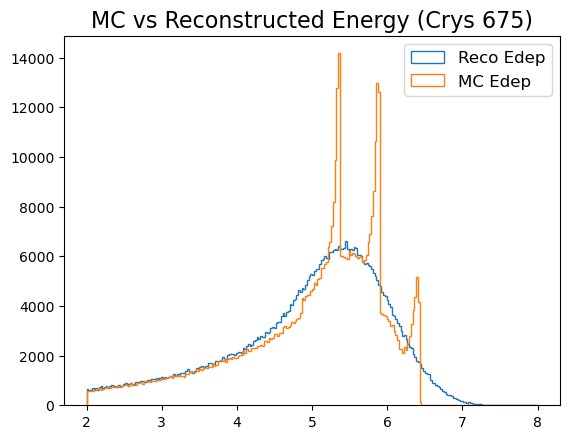

In [21]:
bin_count = 260 #trivially set depending on what we want the y axis to represent (x evts/kev)
energy_binned, bin_location, patches = plt.hist(energy_unbinned,bins=bin_count,histtype='step',range=(2,8),label="Reco Edep") #binning data and creating an x array of bin location
MC_energy_binned, MCbin_location, patches = plt.hist(MC_energy,bins=bin_count,histtype='step',range=(2,8),label="MC Edep") 
plt.title("MC vs Reconstructed Energy (Crys 675)", fontsize=16)
leg = plt.legend(fontsize=12);

In [15]:
print(len(energy_unbinned))
print(len(MC_energy))

573240
572951


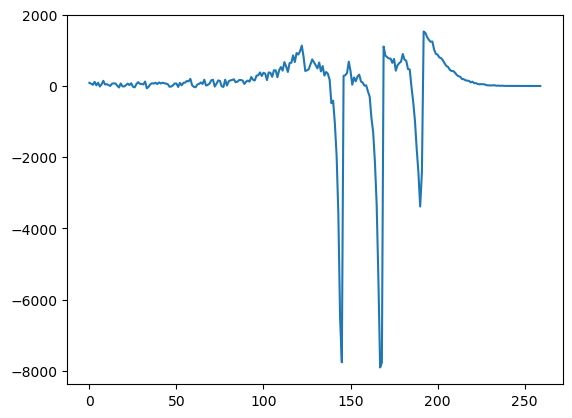

In [26]:
#print(energy_binned-MC_energy_binned)
difference = energy_binned-MC_energy_binned
plt.plot(difference)

In [23]:
print(len(MC_energy_binned))
print(len(energy_binned))

260
260
